In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Deep Reinforcement Learning with Gomoku 

### Gomoku as an RL problem

---
### Judging a field's value by its neighborhood

In [3]:
from GomokuTools import GomokuTools, N_9x9

We make the (admittedly naive and limiting) assumptions that  
1. what matters for the primary estimation of a position's value is determined by the 9x9 neighborhood of that field, and
2. fields that don't share a common line (x, y, or diagonal) with the given position, don't matter either.

Farther fields simply won't directly contribute to a common line of length 5 or smaller.

Class ```N_9x9``` in [GomokuTools.py](GomokuTools.py) describes the world from the point of view of a particular position. This view can be regarded as the relevant environment represented in some kind of polar-coordinates. It is much more meaningful to a neural network (I hope) than the cartesian representation. It allows us to devise a 64-bit representation of the current *threat* or *opportunity* created for a position by the adjacent stones.

```register(color, direction, distance) ``` tells the class that there is a stone of color $c$ in direction $d$ with distance $s$

Observe the different representations of the 9x9 neighborhood: First the hex string representation, then the 64 bits, which we'll eventually feed into our valuation network, and finally the human-readable form we'll use for contemplation throughout this tutorial.

In [5]:
f = N_9x9().register(0, 'nw', 1).register(1, 'nw', 2).register(0, 's', 4)
print(f)
print(f.as_hex())
f.as_bits()

|                 |
|                 |
|    o            |
|      x          |
|        *        |
|                 |
|                 |
|                 |
|        x        |
0000000080000804


[[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]],
 [[1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0]]]

---
### Heuristic Score
The heuristic score class is trying to provide a good measure of reward for offensive and defensive moves. See [Heuristics.ipynb](Heuristics.ipynb) for a deeper look into the reasoning behind this particular implementation.

In [6]:
from HeuristicScore import HeuristicScore
h = HeuristicScore()
n = (N_9x9()
     .register(0, 'e', 1)
     .register(0, 'e', 2)
     .register(0, 'nw', 2)
     .register(0, 'nw', 3))
n

|                 |
|  x              |
|    x            |
|                 |
|        * x x    |
|                 |
|                 |
|                 |
|                 |

A score of $3$ and above means: Serious trouble ahead. That's what we'd expect from the above picture.

In [7]:
h.total_score(n.as_bits())

3.389013711797728

---
## The Gomoku Board

In [10]:
from FastGomokuBoard import FastGomokuBoard as Board

In [11]:
A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,T = 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19

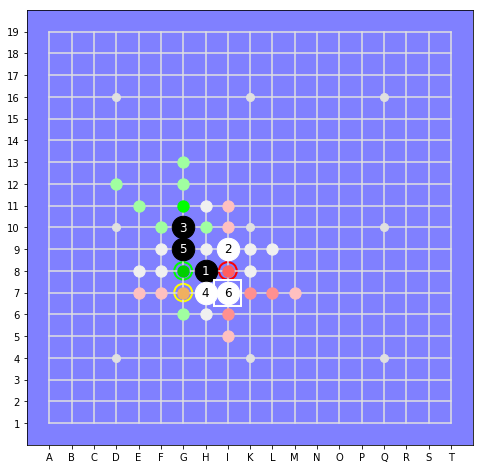

In [133]:
board = Board(19, 8, [(H,8), (I,9), (G,10), (H,7), (G, 9), (I,7)])
board.display(score='current');

---
## Let's play

In [134]:
board.top(5)

([[(7, 8), 2.7855390626549825],
  [(7, 7), 2.5056000564917733],
  [(7, 11), 2.491461879231035],
  [(6, 10), 2.3562354665685175],
  [(7, 12), 2.29739670999407]],
 [[(9, 8), 2.7855390626549825],
  [(11, 7), 2.613403378165517],
  [(9, 6), 2.613403378165517],
  [(10, 7), 2.491461879231035],
  [(7, 7), 2.491461879231035]],
 [[(7, 7), 4.997061935722808],
  [(9, 8), 4.547268652527026],
  [(7, 8), 4.0312700022704995],
  [(7, 11), 3.737192818846552],
  [(10, 7), 3.6401602342280697]])

In [135]:
class NaiveAgent:
    def move(self,board):
        choice = (10, 10)
        top5 = board.top(5)
        o,d,od=top5[0], top5[1], top5[2]
        to, td, tod = o[0], d[0], od[0]
        if td[1] >= 3:
            choice = td[0]
            print("defensive: (%s, %s)" % choice)
        elif to[1] >= 3:
            choice = to[0]
            print("offensive: (%s, %s)" % choice)
        else:
            choice = tod[0]
            print("combined: (%s, %s)" % choice)
        board.set(*choice)

In [136]:
lee = NaiveAgent()

defensive: (9, 11)


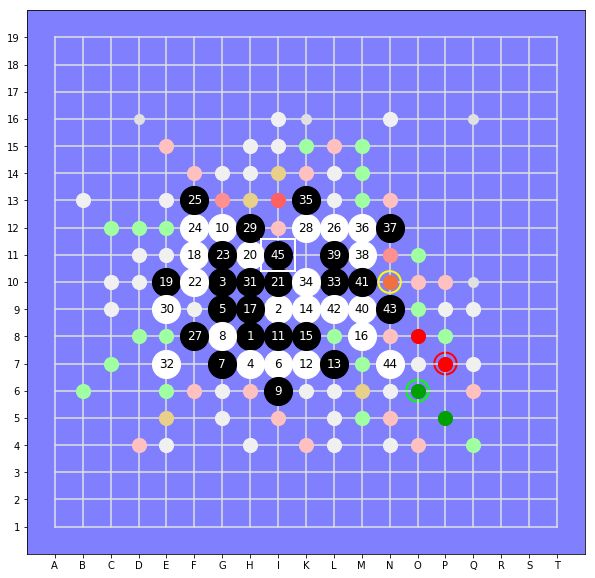

In [322]:
lee.move(board)
#board.undo()
board.display()

In [323]:
board.set(O, 6);

In [324]:
board.save("MyVeryFirstGame.csv")

In [325]:
board1 = Board.from_csv("MyVeryFirstGame.csv")

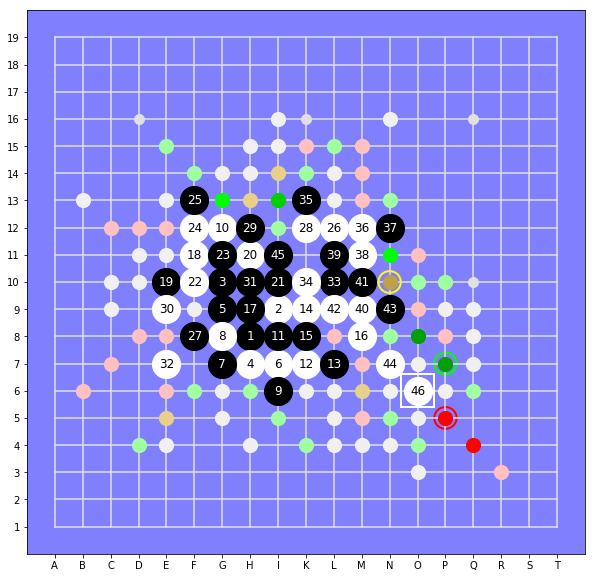

In [326]:
board1.display()